## Dataset Link:
### https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Sum, sqrt, Eq
from sympy.stats import variance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import seaborn as sns
from IPython.display import display

Importing the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ShafiurShuvo/Big-Mart-sales-prediction/refs/heads/main/Train.csv')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
print("Dataset Description:")
df.describe()

Dataset Description:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
print(f"Shape of the dataset (Rows, Columns): {df.shape}")

Shape of the dataset (Rows, Columns): (8523, 12)


Initial features of the dataset

In [ ]:
print("Initial Features:")
for index, key in enumerate(df.keys()):
    print(f"{index+1}. {key}")

Initial Features:
1. Item_Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales


## Cleaning the Data
### Checking for duplicates

In [ ]:
print("Duplicate values:", df.duplicated().sum())

Duplicate values: 0


### **There are no duplicate values on the dataset**

In [ ]:
print(f"Shape of the dataset after removing the duplicate instances: {df.shape}")

Shape of the dataset after removing the duplicate instances: (8523, 12)


### Checking null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Checking the percentage of null values

In [ ]:
df.isnull().mean() * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


### **So there are null values in two columns:**


*   Item_Weight (Numerical Data)
*   Outlet_Size (Categorical Data)


Among these features, Item_Weight is numerical data, whereas Outlet_Size is categorical data. Therefore, the we have to use different imputation methods for neumerical data and categorical data.

### Handling Null values

Finding the mean value of `Item_Weight`

In [ ]:
df['Item_Weight'].mean()

12.857645184135976

Finding the most frequent value of the feature `Outlate_Size`

In [ ]:
df['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


We have to check how much our data spreads out. This helps us understand the difference before and after we fill in missing values. If the spread is small, it's good. In regression, we're searching for patterns. If our data has less spread, our model works better. So, we want less spread or variance.

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


There are no null values now, all are filled

### Checking for unique values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


So we can see here the categorical columns are `Item_Identifier`, `Item_Fat_Content`, `Item_Type`, `Outlet_Identifier`, `Outlet_Size`, `Outlet_Location_Type`, `Outlet_Type`
`

In [ ]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Here in the `Item_Fat_Contene` column there is a problem. Low fat, LF and low fat means the same. Also reg and Regular means same thing. So, we have to convert similar categories to a common format for consistency. This process, called data cleaning, that ensures model interprets these categories correctly without treating them as separate classes.

### Standardizing

In [ ]:
Item_Fat_Content_counts = df['Item_Fat_Content'].value_counts()
print(Item_Fat_Content_counts)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


In [ ]:
# Standardizing 'Item_Fat_Content' values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# Checking the updated counts
Item_Fat_Content_counts = df['Item_Fat_Content'].value_counts()
print(Item_Fat_Content_counts)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


From these result, the `Item_Identifier` column is a unique column. that means all valus here are unique. So we can eleminate this column
### Dropping Column

In [ ]:
df1 = df.drop(columns = ['Item_Identifier'], inplace = False)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


From the above data, we get across two types of data:


*   Nominal (Non ordered) - `Item_Type`, `Outlate_Identifier`, `Outlate_Type`
*   Ordinal (Ordered) - `Item_Fat_Content`, `Outlate_Size`, `Outlate_Location_Type`



## Encoding

In [ ]:
# Identify nominal and ordinal features
nominal_features = ['Item_Type', 'Outlet_Identifier', 'Outlet_Type']
ordinal_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

# One-hot encoding for nominal features
df1 = pd.get_dummies(df1, columns=nominal_features, drop_first=True)

label_encoder = LabelEncoder()
for feature in ordinal_features:
    df1[feature] = label_encoder.fit_transform(df1[feature])

df1 = df1.astype(int)

In [ ]:
df1.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,0,249,1999,1,0,3735,0,0,...,0,0,0,0,0,0,1,1,0,0
1,5,1,0,48,2009,1,2,443,0,0,...,1,0,0,0,0,0,0,0,1,0
2,17,0,0,141,1999,1,0,2097,0,0,...,0,0,0,0,0,0,1,1,0,0
3,19,1,0,182,1998,1,2,732,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,53,1987,0,2,994,0,0,...,0,0,0,0,0,0,0,1,0,0
5,10,1,0,51,2009,1,2,556,0,0,...,1,0,0,0,0,0,0,0,1,0
6,13,1,0,57,1987,0,2,343,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12,0,0,107,1985,1,2,4022,0,0,...,0,0,1,0,0,0,0,0,0,1
8,16,1,0,96,2002,1,1,1076,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19,1,0,187,2007,1,1,4710,0,0,...,0,0,0,0,0,0,0,1,0,0


### Feature Scaling
#### Min-Max Scaler (Normalization)
Using normalized scaling instead of standardized scaling because normalized scaling brings the values into the range from 0 to 1.

In [ ]:
# MinMaxScaler normalization
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

# Convert NumPy array to DataFrame with original column names
column_names = df1.columns
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
df_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.294118,0.0,0.0,0.927660,0.583333,0.5,0.0,0.283613,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.058824,1.0,0.0,0.072340,1.000000,0.5,1.0,0.031410,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.764706,0.0,0.0,0.468085,0.583333,0.5,0.0,0.158125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.882353,1.0,0.0,0.642553,0.541667,0.5,1.0,0.053551,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.0,0.0,0.093617,0.083333,0.0,1.0,0.073623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.117647,0.0,0.0,0.778723,0.083333,0.0,1.0,0.210296,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,0.235294,1.0,0.0,0.327660,0.708333,0.5,0.5,0.039531,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.352941,0.0,0.0,0.229787,0.791667,1.0,0.5,0.088868,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,0.176471,1.0,0.0,0.306383,1.000000,0.5,1.0,0.138819,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


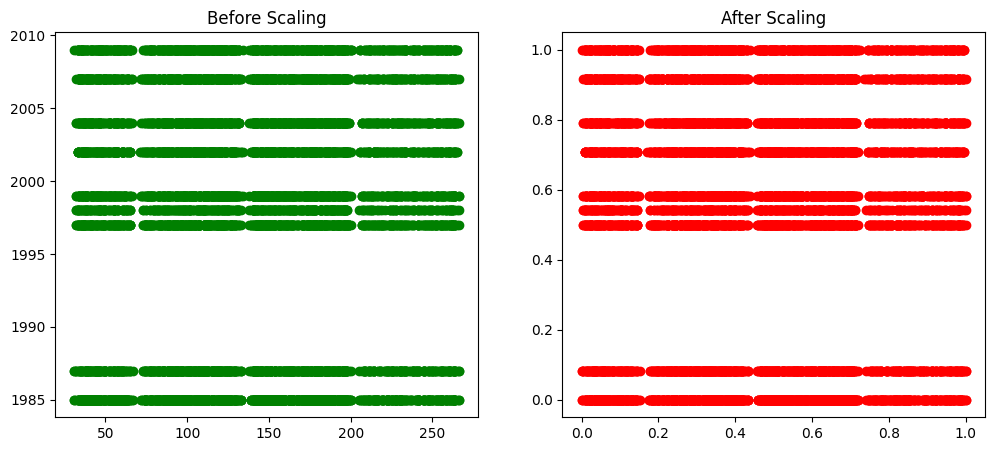

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df1['Item_MRP'], df1['Outlet_Establishment_Year'], c = "green")
ax1.set_title("Before Scaling")
ax2.scatter(df_scaled['Item_MRP'], df_scaled['Outlet_Establishment_Year'], c = "red")
ax2.set_title("After Scaling")
plt.show()

**Successful scaling:** The plots above suggests that the scaling was successful because we can see the features remain identical before and after scaling.

In [ ]:
corr = df_scaled.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.022138,NaN,0.025309,0.016347,-0.011796,0.000081,0.009076,-0.052514,-0.004232,...,0.006518,-0.019947,-0.027247,0.003534,-0.012013,0.006630,0.011496,0.019642,0.006518,-0.027247
Item_Fat_Content,-0.022138,1.000000,NaN,0.006030,0.003151,-0.000622,-0.001598,0.018718,0.032643,0.065711,...,0.002129,-0.004300,0.000183,-0.003154,-0.006029,0.003147,0.004722,0.000533,0.002129,0.000183
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,0.025309,0.006030,NaN,1.000000,0.005106,0.006104,0.000234,0.567516,-0.000180,0.001429,...,0.003907,-0.004988,-0.006792,0.012032,-0.000275,0.005976,-0.003898,0.004866,0.003907,-0.006792
Outlet_Establishment_Year,0.016347,0.003151,NaN,0.005106,1.000000,0.193389,-0.089216,-0.049134,-0.003631,-0.006768,...,0.466336,-0.393918,-0.538072,0.257868,0.174150,-0.034777,0.048836,0.245070,0.466336,-0.538072
Outlet_Size,-0.011796,-0.000622,NaN,0.006104,0.193389,1.000000,-0.614311,-0.086183,0.003608,-0.003102,...,-0.099476,0.354967,-0.099896,0.483409,-0.099536,0.483409,-0.099596,-0.010163,-0.099476,-0.099896
Outlet_Location_Type,0.000081,-0.001598,NaN,0.000234,-0.089216,-0.614311,1.000000,0.089368,0.003987,-0.000532,...,0.381559,-0.351898,0.383172,-0.048605,-0.048576,-0.479230,-0.479230,-0.472793,0.381559,0.383172
Item_Outlet_Sales,0.009076,0.018718,NaN,0.567516,-0.049134,-0.086183,0.089368,1.000000,0.002329,-0.004655,...,-0.038059,-0.277252,0.311192,0.052824,0.002275,0.019803,0.034262,0.108767,-0.038059,0.311192
Item_Type_Breads,-0.052514,0.032643,NaN,-0.000180,-0.003631,0.003608,0.003987,0.002329,1.000000,-0.019918,...,-0.000734,0.001297,0.007693,0.003588,0.012563,-0.003090,-0.005316,-0.006189,-0.000734,0.007693
Item_Type_Breakfast,-0.004232,0.065711,NaN,0.001429,-0.006768,-0.003102,-0.000532,-0.004655,-0.019918,1.000000,...,0.000077,0.013736,-0.003550,-0.006677,-0.006638,-0.006677,0.003325,-0.008695,0.000077,-0.003550


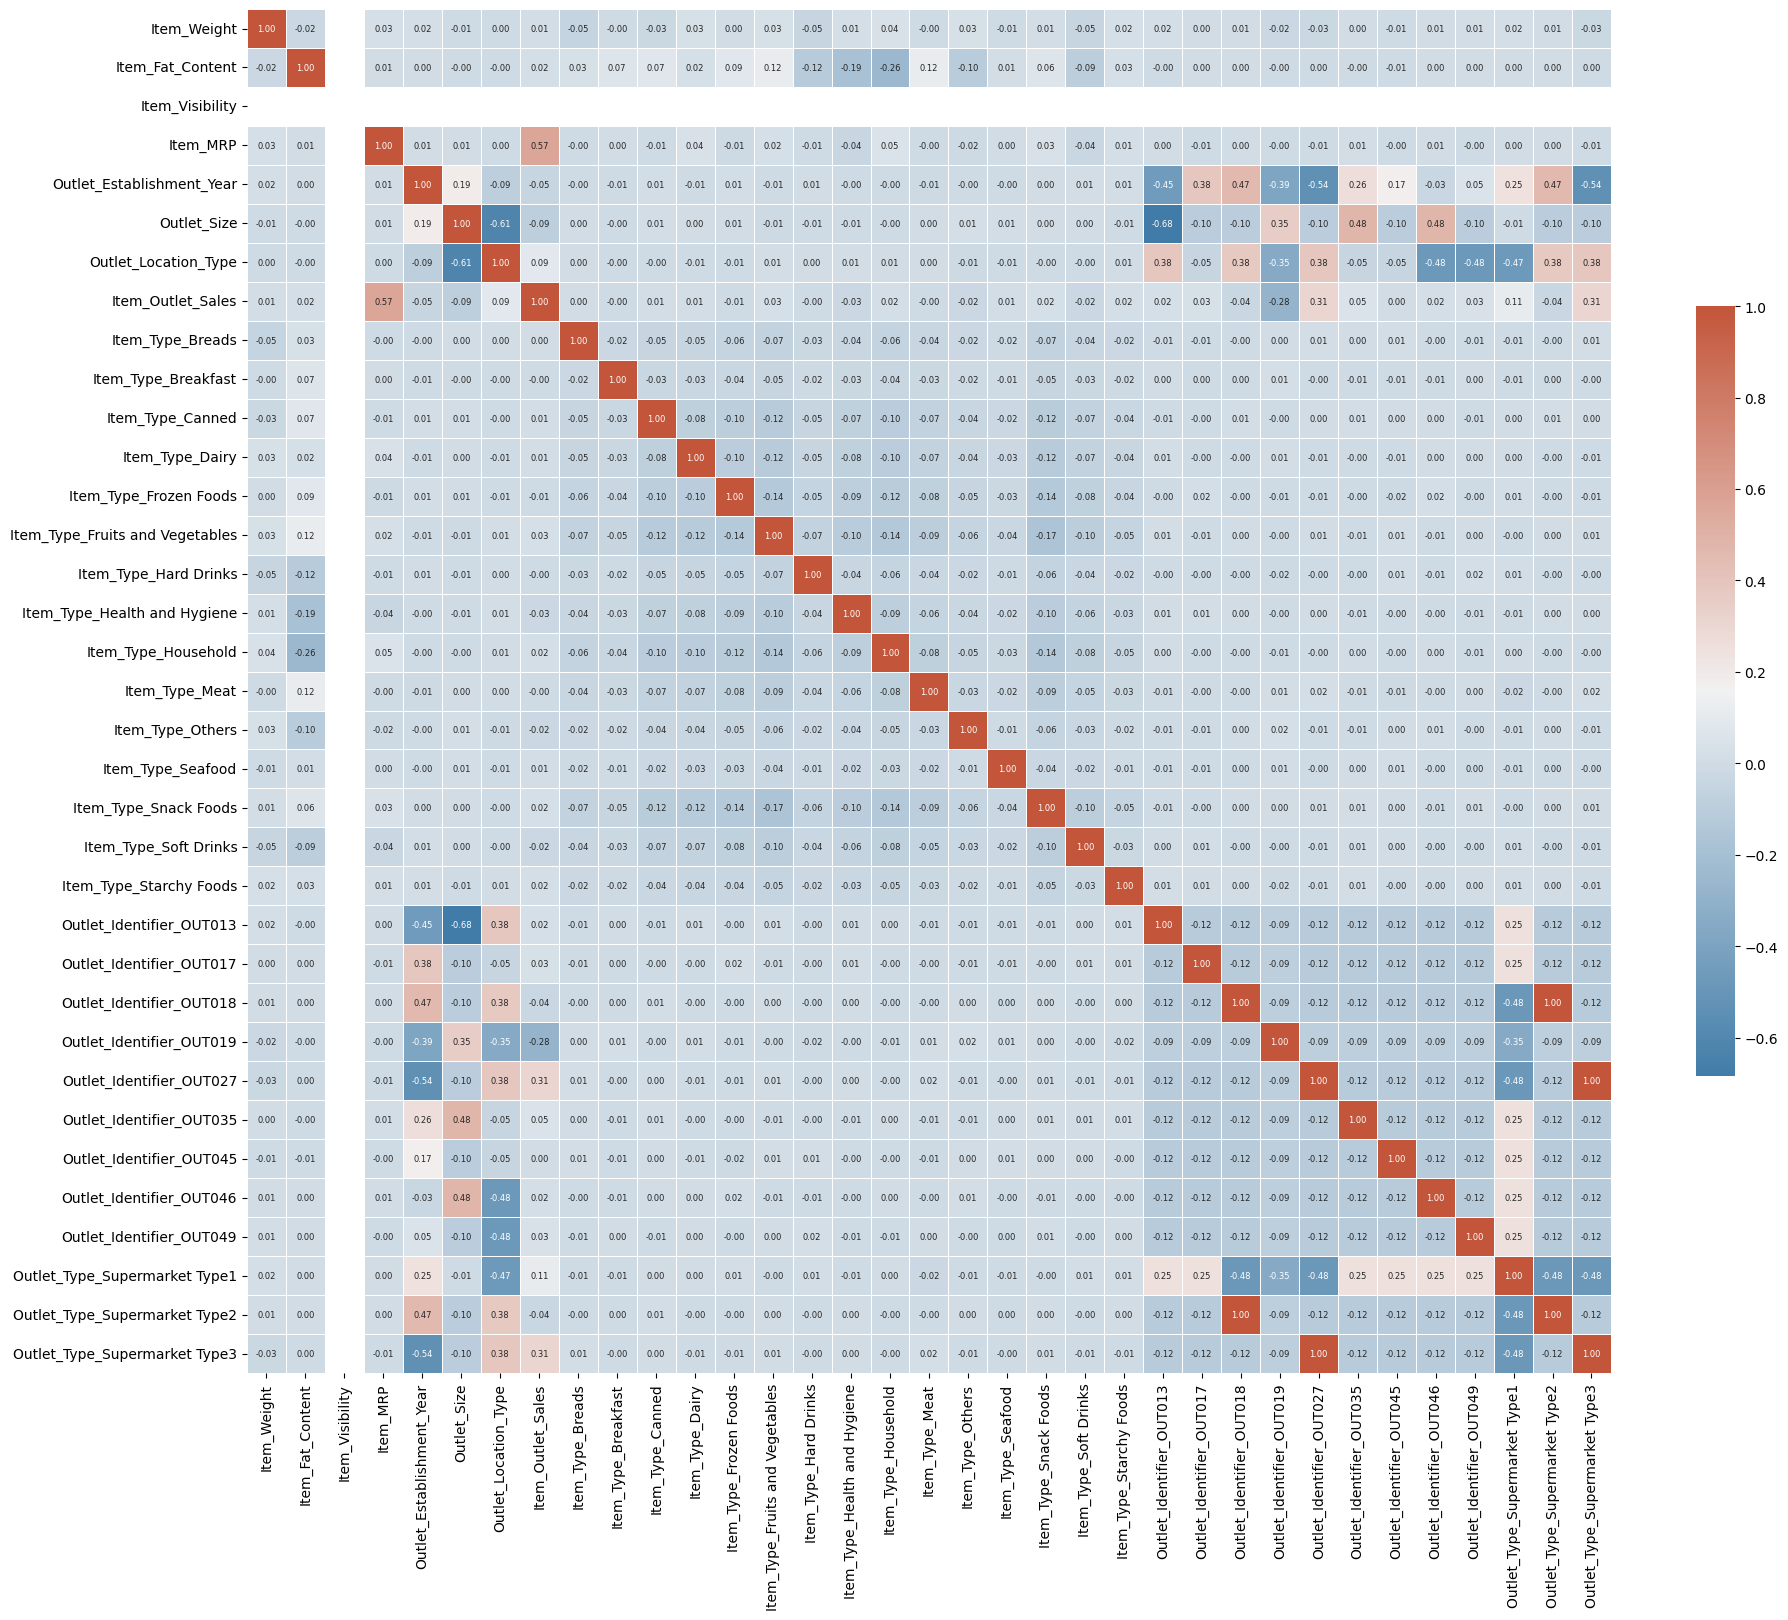

In [ ]:
plt.figure(figsize=(22, 20))

cmap = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 6})

plt.show()

From the correlation heatmap, we can see that value for `Item_Visibility` column is 0.00. That means this is not correlated. Beacuse all the values of this column becomes 0 after scaling. So we may drop this feature

In [ ]:
df_scaled = df_scaled.drop(columns = ['Item_Visibility'], inplace = False)

In [ ]:
df_scaled.shape

(8523, 34)

Nafin's work

### Creating Output Data and Removing the Output Column from our Features

In [ ]:
# Define features (X) and target (y)
X = df_scaled.drop(columns=['Item_Outlet_Sales'])
y = df_scaled['Item_Outlet_Sales']

### Splitting the Dataset

In [ ]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 33) (5966, 33) (2557, 33)


We can observe that

*   X contains the original data which is 8523
*   X_trains contains 70% of the data which is 5966
*   X_test contains 30% of the data which is 2557







# Model Training

1.   Linear Regression
2.   Random Forest
3.   Decision Tree
4.   XGBoost

###  **Evaluation metrics**

*   R²
*   MSE (Mean Squared Error)
*   MAE (Mean Absolute Error)
*   RMSE (Root Mean Squared Error)


In [ ]:
# Define symbols
n = symbols('n', positive=True, integer=True)
i = symbols('i', integer=True)
y_i = symbols('y_i')        # Actual value
y_pred_i = symbols('y_pred_i')  # Predicted value
mean_y = symbols('mean_y')  # Mean of actual values

# MAE Formula
mae = Eq(symbols('MAE'), (1/n) * Sum(abs(y_i - y_pred_i), (i, 1, n)))

# MSE Formula
mse = Eq(symbols('MSE'), (1/n) * Sum((y_i - y_pred_i)**2, (i, 1, n)))

# RMSE Formula
rmse = Eq(symbols('RMSE'), sqrt((1/n) * Sum((y_i - y_pred_i)**2, (i, 1, n))))

# R2 Formula
r2 = Eq(symbols('R^2'), 1 - (Sum((y_i - y_pred_i)**2, (i, 1, n)) / Sum((y_i - mean_y)**2, (i, 1, n))))

display(r2, rmse, mse, mae)

Eq(R^2, 1 - Sum((y_i - y_pred_i)**2, (i, 1, n))/Sum((-mean_y + y_i)**2, (i, 1, n)))

Eq(RMSE, sqrt(Sum((y_i - y_pred_i)**2, (i, 1, n)))/sqrt(n))

Eq(MSE, Sum((y_i - y_pred_i)**2, (i, 1, n))/n)

Eq(MAE, Sum(Abs(y_i - y_pred_i), (i, 1, n))/n)

Where:
- `y_i`: Actual value of the target variable.
- `y_pred_i`: Predicted value of the target variable.
- `mean_y`: Mean of the actual target values.
- `n`: Number of data points.

# Model 1: Linear Regression

In [ ]:
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Linear Regression:")
print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Linear Regression:
R² Score: 0.5681260906679102
Root Mean Squared Error (RMSE): 0.08426056758866686
Mean Squared Error (MSE): 0.007099843250364296
Mean Absolute Error (MAE): 0.062030351285813766


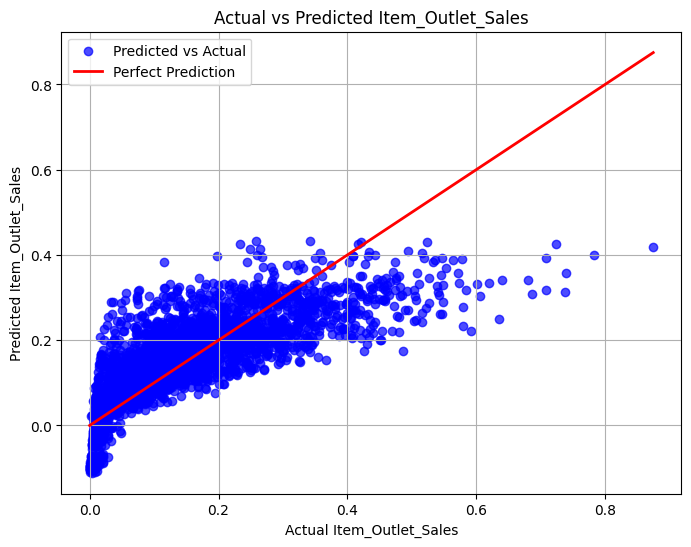

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Item_Outlet_Sales')
plt.legend()
plt.grid(True)
plt.show()

# Model 2: Random Forest

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=50)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
r2_rf = r2_score(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor Metrics:")
print(f"R² Score: {r2_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean absolute error (MAE): {mae}")

Random Forest Regressor Metrics:
R² Score: 0.5189003350709548
Root Mean Squared Error (RMSE): 0.08893309845041511
Mean Squared Error (MSE): 0.007909095999991227
Mean absolute error (MAE): 0.062030351285813766


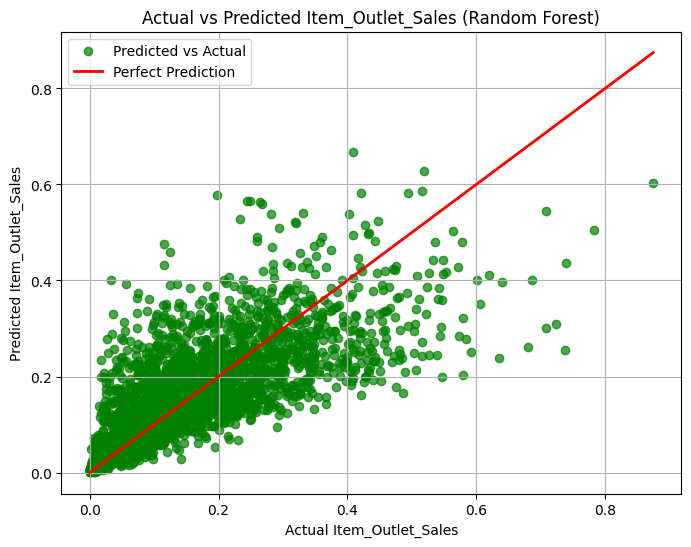

In [ ]:
# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred, color='green', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Item_Outlet_Sales (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Model 3: Decision Tree

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_dt_pred = dt_model.predict(X_test)

# Calculate R², MSE and MAE score
r2_dt = r2_score(y_test, y_dt_pred)
mse_dt = mean_squared_error(y_test, y_dt_pred)
mae_dt = mean_absolute_error(y_test, y_dt_pred)
rmse_dt = np.sqrt(mse_dt)

print("Decision Tree Regressor Metrics:")
print(f"R² Score: {r2_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")

Decision Tree Regressor Metrics:
R² Score: 0.14032866539411515
Root Mean Squared Error (RMSE): 0.11888090952338914
Mean Squared Error (MSE): 0.014132670649108236
Mean Absolute Error (MAE): 0.08269784918565957


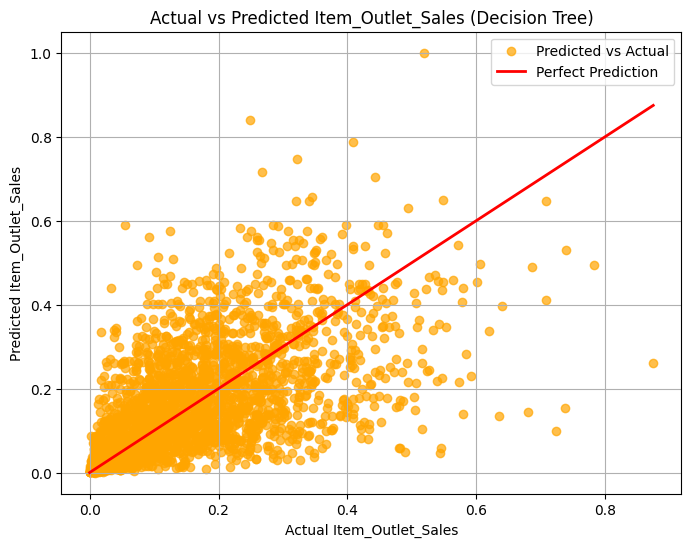

In [ ]:
# Plotting actual vs predicted values for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_dt_pred, color='orange', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Item_Outlet_Sales (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Model 4: XGBoost

In [ ]:
# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_xgb_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost
r2_xgb = r2_score(y_test, y_xgb_pred)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
mae_xgb = mean_absolute_error(y_test, y_xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost Regressor Metrics:")
print(f"R² Score: {r2_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")

XGBoost Regressor Metrics:
R² Score: 0.5039298160363641
Root Mean Squared Error (RMSE): 0.09030617727642055
Mean Squared Error (MSE): 0.008155205654280295
Mean Absolute Error (MAE): 0.06258724943295198


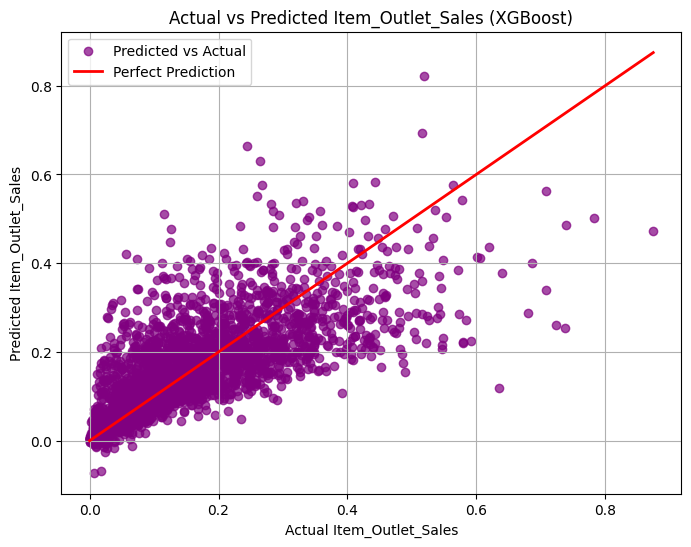

In [ ]:
# Plot actual vs. predicted values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_xgb_pred, color='purple', label='Predicted vs Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Item_Outlet_Sales (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

# Models Comparison

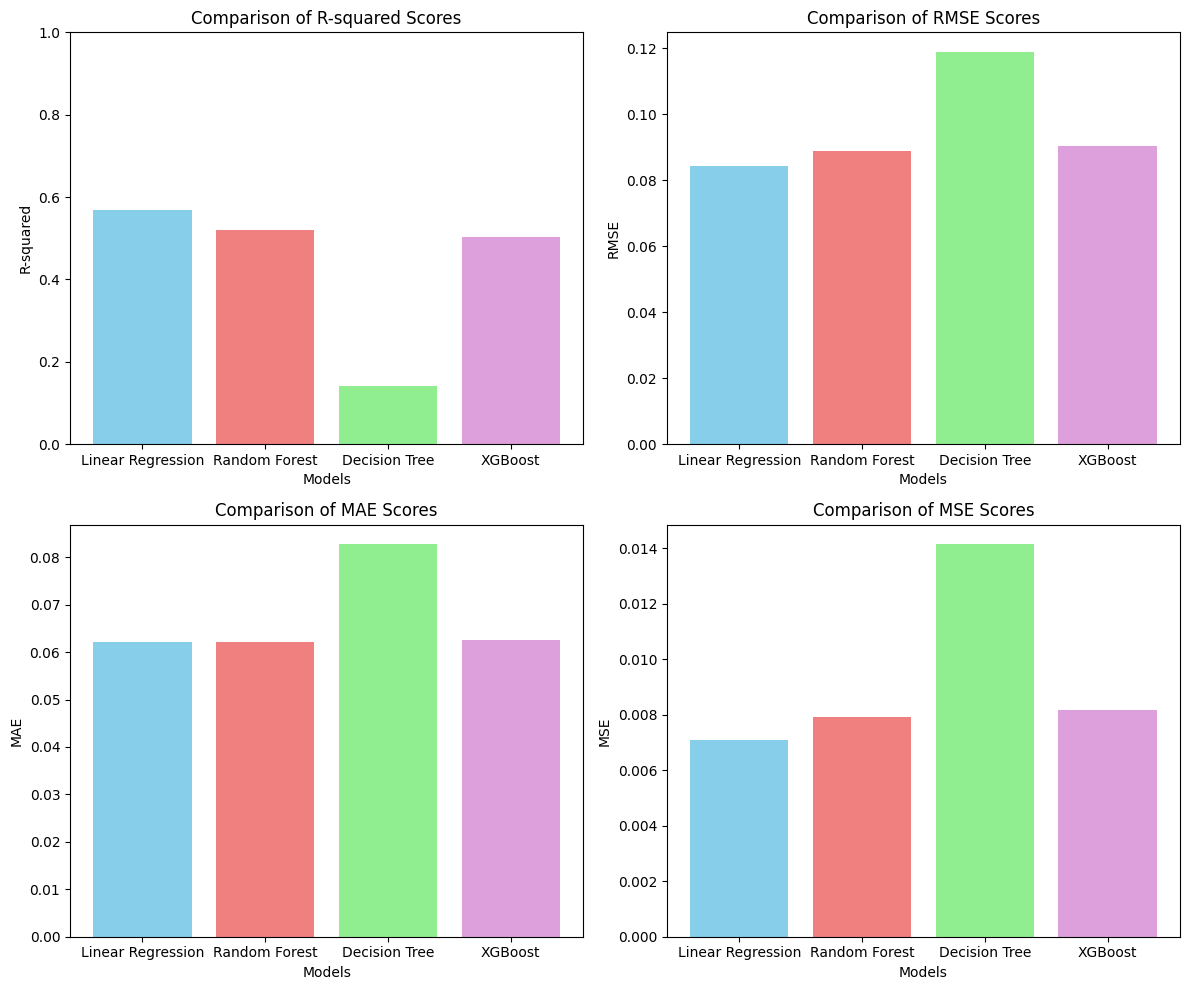

In [ ]:
# R2 scores
r2_scores = {
    'Linear Regression': r2,
    'Random Forest': r2_rf,
    'Decision Tree': r2_dt,
    'XGBoost': r2_xgb
}

# RMSE scores
rmse_scores = {
    'Linear Regression': rmse,
    'Random Forest': rmse_rf,
    'Decision Tree': rmse_dt,
    'XGBoost': rmse_xgb
}

# MSE scores
mse_scores = {
    'Linear Regression': mse,
    'Random Forest': mse_rf,
    'Decision Tree': mse_dt,
    'XGBoost': mse_xgb
}


# MAE scores
mae_scores = {
    'Linear Regression': mae,
    'Random Forest': mae_rf,
    'Decision Tree': mae_dt,
    'XGBoost': mae_xgb
}


# Create bar charts for each metric
plt.figure(figsize=(12, 10))

# R-squared Scores
plt.subplot(2, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.ylim(0, 1)

# RMSE Scores
plt.subplot(2, 2, 2)
plt.bar(rmse_scores.keys(), rmse_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Scores')

# MAE Scores
plt.subplot(2, 2, 3)
plt.bar(mae_scores.keys(), mae_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE Scores')

# MSE Scores
plt.subplot(2, 2, 4)
plt.bar(mse_scores.keys(), mse_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE Scores')

plt.tight_layout()
plt.show()